## 1) First Cluster 

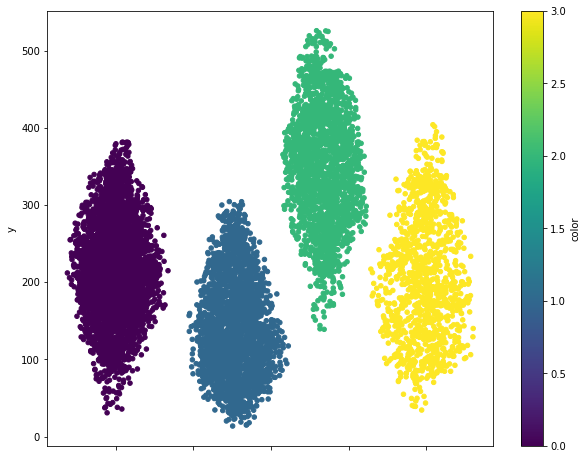

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

data = pd.DataFrame(pd.read_csv('cluster_1.csv'))
data.plot(kind='scatter',x='x',y='y',c='color',figsize=(10,8),cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
%%capture --no-stdout
# Normalize the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define the range of n_clusters 1 to 10
n_clusters_range = range(1, 11)

# Lists to store the inertia values for each n_clusters
inertia_values = []

# Iterate over different values of n_clusters
for n_clusters in n_clusters_range:
    # Create KMeans instance with the current n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    ''' clustering algorithm used in machine learning for partitioning a dataset into a set of distinct,
    non-overlapping subgroups, or clusters.'''
    
    # Fit the data and obtain inertia
    kmeans.fit(data_scaled)
    
    # Append the inertia to the list
    inertia_values.append(kmeans.inertia_)
    '''In the context of K-means clustering, "inertia" refers to the sum of squared distances between each data point
    and its assigned cluster center. The inertia of a clustering is a measure of how internally coherent the clusters are.
    Lower inertia values generally indicate better-defined clusters'''

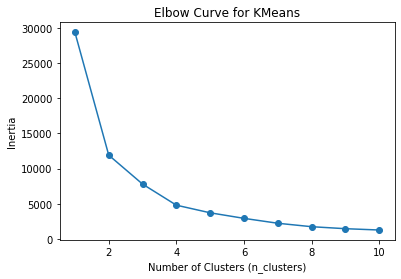

In [17]:
# Plot the elbow curve to visualize the optimal number of clusters
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.title('Elbow Curve for KMeans')
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Inertia')
plt.show()

Looking into the elbow curve and the data scatter plot, we can choose the addequate n_cluster = 4 for our purpose. note: model.score n'est pas le R2

In [21]:
%%capture --no-stdout
best_cluster = 5
# Create a KMeans instance with the chosen number of clusters
kmeans = KMeans(n_clusters=best_cluster, random_state=42)

X = data['x'].values.reshape(-1, 1)
y = data['y']

# Normalize the X using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the model to the data
kmeans.fit(data_scaled)

# Get cluster labels for each data point
labels = kmeans.labels_

# Get cluster centers
centers = kmeans.cluster_centers_

x_center_coord = centers[:,0]
y_center_coord = centers[:,1]

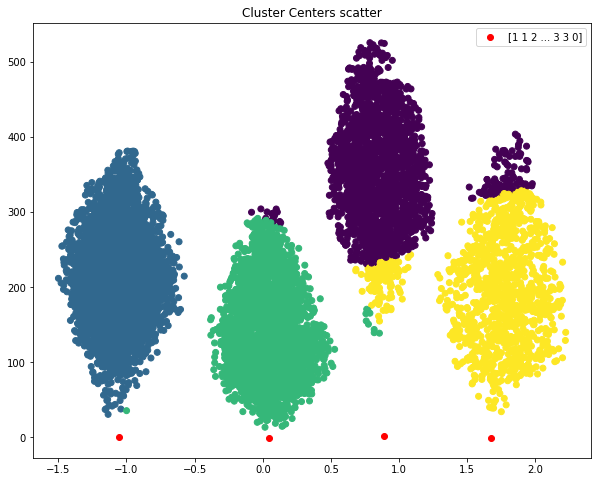

Cluster centers: 

(x,y)1=(0.8871253497621189, 1.340428070594085)

(x,y)2=(-1.05594138208011, -0.09518881303891684)

(x,y)3=(0.043503290794540274, -0.8118793763616708)

(x,y)4=(1.6722034735389433, -0.28119612143263617)



In [20]:
plt.figure(figsize=(10,8))
plt.title('Cluster Centers scatter')
plt.scatter(X_scaled,y,c=labels)
plt.scatter(x_center_coord, y_center_coord, color='red',label=labels)
plt.legend()
plt.show()

print("Cluster centers: \n")
for i in range(1,5):
    print(f'(x,y){i}=({centers[i-1,0]}, {centers[i-1,1]})\n')

## 2) Second Cluster

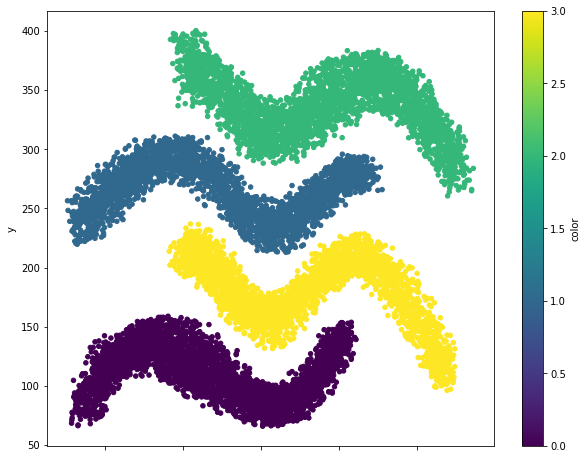

In [23]:
cluster2 = pd.DataFrame(pd.read_csv("/home/pers/allouche/PHY2446M/Data/cluster_2.csv"))

cluster2.plot(kind='scatter',x='x',y='y',c='color',figsize=(10,8),cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
%%capture --no-stdout
# Normalize the data using StandardScaler
scaler = StandardScaler()
data2_scaled = scaler.fit_transform(cluster2)

# Define the range of n_clusters 1 to 10
n_clusters_range = range(1, 11)

# Lists to store the inertia values for each n_clusters
inertia_values = []

# Iterate over different values of n_clusters
for n_clusters in n_clusters_range:
    # Create KMeans instance with the current n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    ''' clustering algorithm used in machine learning for partitioning a dataset into a set of distinct,
    non-overlapping subgroups, or clusters.'''
    
    # Fit the data and obtain inertia
    kmeans.fit(data2_scaled)
    
    # Append the inertia to the list
    inertia_values.append(kmeans.inertia_)
    '''In the context of K-means clustering, "inertia" refers to the sum of squared distances between each data point
    and its assigned cluster center. The inertia of a clustering is a measure of how internally coherent the clusters are.
    Lower inertia values generally indicate better-defined clusters'''

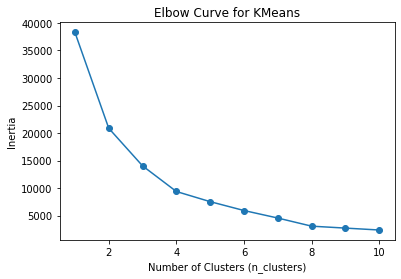

In [25]:
# Plot the elbow curve to visualize the optimal number of clusters
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.title('Elbow Curve for KMeans')
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Inertia')
plt.show()

In [27]:
%%capture --no-stdout
# let's choose the best_cluster number as 8
best_cluster = 8
# Create a KMeans instance with the chosen number of clusters
kmeans = KMeans(n_clusters=best_cluster, random_state=42)

X2 = cluster2['x'].values.reshape(-1, 1)
y2 = cluster2['y']

# Normalize the X using StandardScaler
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# Fit the model to the data
kmeans.fit(data2_scaled)

# Get cluster labels for each data point
labels = kmeans.labels_

# Get cluster centers
centers2 = kmeans.cluster_centers_

x_center_coord2 = centers2[:,0]
y_center_coord2 = centers2[:,1]


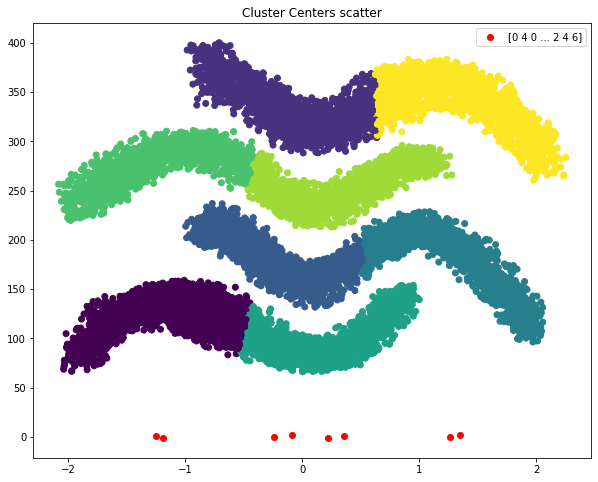

Cluster centers: 

(x,y)1=(-1.0570178448483374, 0.47463917207631845)

(x,y)2=(0.828968393467145, 1.8476828520556867)

(x,y)3=(0.04960829506714968, -1.2570279308725294)

(x,y)4=(1.771565987541464, 0.5961531073825734)

(x,y)5=(0.8719846415213915, 0.6005533598050221)

(x,y)6=(-1.0549754857162352, -0.5926848763792101)

(x,y)7=(0.03334303866417515, -0.1954249076799151)

(x,y)8=(1.7786904969114974, -0.7668764826029794)



In [30]:
plt.figure(figsize=(10,8))
plt.title('Cluster Centers scatter')
plt.scatter(X2_scaled,y2,c=labels)
plt.scatter(x_center_coord2, y_center_coord2, color='red',label=labels)
plt.legend()
plt.show()

print("Cluster centers: \n")
for i in range(1,9):
    print(f'(x,y){i}=({centers[i-1,0]}, {centers[i-1,1]})\n')

The KMEANS fitting is not precise enough for our application.

[0 0 0 ... 0 0 0]


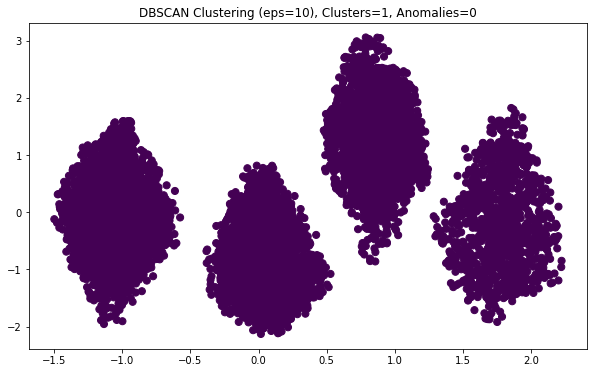

[0 0 0 ... 0 0 0]


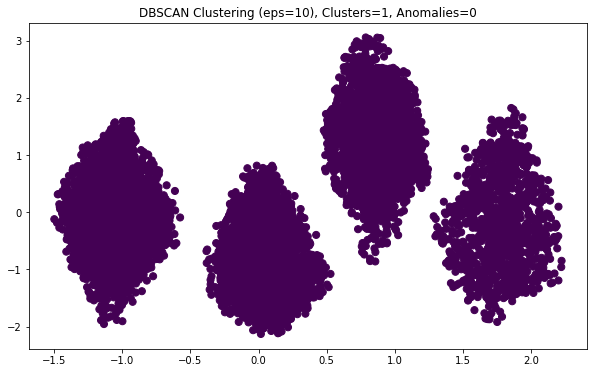

In [54]:
from sklearn.cluster import DBSCAN

'''Utilisation de DBSCAN (Density-Based Spatial Clustering of Applications with Noise)'''

    # Try different values of eps

for i in range(10,12):
    # Apply DBSCAN
    dbscan = DBSCAN(eps=i, min_samples=5)
    labels = dbscan.fit_predict(data_scaled)

    # Count the number of clusters and anomaly points
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    num_anomalies = np.sum(labels == -1)
    print(labels)
    # Plot the clusters
    plt.figure(figsize=(10,6))
    plt.scatter(data_scaled[:,0], data_scaled[:,1], c=labels, cmap='viridis', marker='o', s=50)
    plt.title(f'DBSCAN Clustering (eps={eps}), Clusters={num_clusters}, Anomalies={num_anomalies}')
    plt.show()
